<img src='http://drive.google.com/uc?export=view&id=1ZhMMgLVVc2Tm79BanxAusgHB51pgC6iL'>

# <font color='lightblue'>Making Predictions</font>

In this project you will build a model to make predictions. This project will build on your exploritory data analyitic (EDA) skills. You may choose to use the datasets you used with project 1 or move to another dataset. 

In this project you will:

1.  Develop an understanding of the dataset
2.  Do exploritory data analysis and visualzation
3.  Do some data preprocessing
4.  Build a predictive model 
5.  Measure the performance of your model
6.  Summarize and interpret your results



**Action:** Import python libraries


In [ ]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
!pip install dtreeviz
from dtreeviz.trees import dtreeviz 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## <font color='lightblue'>1. Data Understanding </font>

**Action:** Import your data into colaboratory.


In [ ]:
# Importing raw data from file
df_goalie_stats = pd.read_csv('/content/game_goalie_stats.csv')
df_skater_stats = pd.read_csv('/content/game_skater_stats.csv')
df_players = pd.read_csv('/content/player_info.csv')

**Action:** Determine the types of data are you dealing with & handle missing data (if there is any!). *Marks (0.5)*

In [ ]:
# Data Explaination
#
# This dataset is a little more complex than Im used to. At the core of the data
# are individual stat lines for each player in every game. There is a table for
# goalie stat lines, and skater stat lines. Becuase I dont want to have this much
# data, I will try to group the stat lines by player to get an average value for
# their stats across their entire career. I can then concatinate the two tables
# to get a large set of career stats for all players.
#
# I will then join the table with the player info table to get the names, heights
# weights and other useful pieces of information.

In [ ]:
# Helper function
def dataHelper(df):
  print("=========== SHAPE ================")
  print(df.shape)
  print("=========== DATA TYPES ===========")
  print(df.dtypes)
  print("=========== NULL VALUES ==========")
  print(df.isna().sum())

In [ ]:
# Data info for goalies
dataHelper(df_goalie_stats)

=========== SHAPE ================
(56656, 19)
=========== DATA TYPES ===========
game_id                         int64
player_id                       int64
team_id                         int64
timeOnIce                       int64
assists                         int64
goals                           int64
pim                             int64
shots                           int64
saves                           int64
powerPlaySaves                  int64
shortHandedSaves                int64
evenSaves                       int64
shortHandedShotsAgainst         int64
evenShotsAgainst                int64
powerPlayShotsAgainst           int64
decision                       object
savePercentage                float64
powerPlaySavePercentage       float64
evenStrengthSavePercentage    float64
dtype: object
=========== NULL VALUES ==========
game_id                          0
player_id                        0
team_id                          0
timeOnIce                        0
assists

In [ ]:
# Remove all missing values. It wont make any meaningful impact on our dataset
df_goalie_stats = df_goalie_stats.dropna(how='any')

# 'shots' in this table refers to the shots a golie recieves rather than takes.
# Becuase goalies rarely ever take shots (and the stat isnt tracked here), we
# will set this value to be 0 for all goalies.
df_goalie_stats['shots'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
dataHelper(df_skater_stats)

=========== SHAPE ================
(945830, 22)
=========== DATA TYPES ===========
game_id                   int64
player_id                 int64
team_id                   int64
timeOnIce                 int64
assists                   int64
goals                     int64
shots                     int64
hits                    float64
powerPlayGoals            int64
powerPlayAssists          int64
penaltyMinutes            int64
faceOffWins               int64
faceoffTaken              int64
takeaways               float64
giveaways               float64
shortHandedGoals          int64
shortHandedAssists        int64
blocked                 float64
plusMinus                 int64
evenTimeOnIce             int64
shortHandedTimeOnIce      int64
powerPlayTimeOnIce        int64
dtype: object
=========== NULL VALUES ==========
game_id                      0
player_id                    0
team_id                      0
timeOnIce                    0
assists                      0
goals    

In [ ]:
# Remove all missing values. (NHL didnt track these stats prior to 1997)
df_skater_stats = df_skater_stats.dropna(how='any')

In [ ]:
# Concatinate goalies and skaters. Only keeping common columns
df_player_stats = pd.concat([df_goalie_stats, df_skater_stats], join='inner', ignore_index=True)

In [ ]:
# Data info for combined skaters and goalies
dataHelper(df_player_stats)

=========== SHAPE ================
(597007, 7)
=========== DATA TYPES ===========
game_id      int64
player_id    int64
team_id      int64
timeOnIce    int64
assists      int64
goals        int64
shots        int64
dtype: object
=========== NULL VALUES ==========
game_id      0
player_id    0
team_id      0
timeOnIce    0
assists      0
goals        0
shots        0
dtype: int64


In [ ]:
# Group each statline by player to get an average stat for each players career.
df_player_stats = df_player_stats.groupby('player_id')[['timeOnIce', 'assists', 'goals', 'shots']].mean()
df_player_stats.head()

,timeOnIce,assists,goals,shots
player_id,,,,
8445275,3584.135135,0.000000,0.000000,0.000000
8445386,3554.233333,0.036364,0.000000,0.000000
8445470,3308.120000,0.040000,0.000000,0.000000
8445769,3561.933921,0.026432,0.000000,0.000000
8446485,617.200000,0.109091,0.109091,1.090909


In [ ]:
# Data info for the players info
dataHelper(df_players)

=========== SHAPE ================
(3925, 12)
=========== DATA TYPES ===========
player_id               int64
firstName              object
lastName               object
nationality            object
birthCity              object
primaryPosition        object
birthDate              object
birthStateProvince     object
height                 object
height_cm             float64
weight                float64
shootsCatches          object
dtype: object
=========== NULL VALUES ==========
player_id                0
firstName                0
lastName                 0
nationality              8
birthCity                5
primaryPosition          0
birthDate                0
birthStateProvince    1123
height                   3
height_cm                3
weight                   3
shootsCatches           17
dtype: int64


In [ ]:
# Drop missing values for 'height', 'height_cm', 'weight', 'shootsCatches'.
# We can leave the other missing values becuase of their nature. We would expect
# to see some missing values in location data becuase not every country has
# states/provinces etc.
df_players = df_players[df_players.height.isna()==False]
df_players = df_players[df_players.shootsCatches.isna()==False]

In [ ]:
# Joining tables
df_players = pd.merge(df_players, df_player_stats, how='inner', on='player_id')
df_players.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches,timeOnIce,assists,goals,shots
0,8466148,Marian,Hossa,SVK,Stará Lubovna,RW,1979-01-12 00:00:00,NaN,"6' 1""",185.42,207.0,L,1116.709964,0.430605,0.320285,3.030249
1,8465058,Michal,Rozsival,CZE,Vlasim,D,1978-09-03 01:00:00,NaN,"6' 1""",185.42,210.0,R,1091.200501,0.205514,0.030075,0.791980
2,8476906,Shayne,Gostisbehere,USA,Pembroke Pines,D,1993-04-20 01:00:00,FL,"5' 11""",180.34,180.0,L,1181.377593,0.390041,0.139004,2.338174
3,8466285,Brian,Campbell,CAN,Strathroy,D,1979-05-23 01:00:00,ON,"5' 10""",177.80,192.0,L,1429.192661,0.344954,0.073394,1.324771
4,8470607,Brent,Seabrook,CAN,Richmond,D,1985-04-20 01:00:00,BC,"6' 3""",190.50,220.0,R,1313.008734,0.318777,0.104803,1.840611


In [ ]:
# Final data info
dataHelper(df_players)

=========== SHAPE ================
(2433, 16)
=========== DATA TYPES ===========
player_id               int64
firstName              object
lastName               object
nationality            object
birthCity              object
primaryPosition        object
birthDate              object
birthStateProvince     object
height                 object
height_cm             float64
weight                float64
shootsCatches          object
timeOnIce             float64
assists               float64
goals                 float64
shots                 float64
dtype: object
=========== NULL VALUES ==========
player_id               0
firstName               0
lastName                0
nationality             2
birthCity               2
primaryPosition         0
birthDate               0
birthStateProvince    658
height                  0
height_cm               0
weight                  0
shootsCatches           0
timeOnIce               0
assists                 0
goals                   0


**Action:** Estimate the summary statistics of some of the key variables. *Marks (0.5)*

In [ ]:
# Helper function to print summary statistics for a given field
def SumStats(field):
  meanVal = df_players[field].mean()
  medianVal = df_players[field].median()
  modeVal = df_players[field].mode()
  stdVal = df_players[field].std()

  print("============ Field:", field, "============")
  print("mean:", meanVal)
  print("median:", medianVal)
  print("mode:", modeVal[0])
  print("std:", stdVal)
  print("")

In [ ]:
# Time On Ice
SumStats('timeOnIce')

# Assists
SumStats('assists')

# Goals
SumStats('goals')

# Shots
SumStats('shots')

============ Field: timeOnIce ============
mean: 1174.9831250025043
median: 880.138255033557
mode: 3600.0
std: 927.6757205495819

============ Field: assists ============
mean: 0.15680981143655243
median: 0.13333333333333333
mode: 0.0
std: 0.14706490644790834

============ Field: goals ============
mean: 0.0889474024048957
median: 0.059665871121718374
mode: 0.0
std: 0.10242569363577465

============ Field: shots ============
mean: 1.1167867015435262
median: 1.0808080808080809
mode: 0.0
std: 0.7604804807451182



## <font color='lightblue'>2. Data Exploration and Visualization </font>

**Action:** Visualize 1- the distribution of values for some key variables, and 2- the relationships between key variables. Remember to add text that walks a reader through what you found. *Marks: 2*

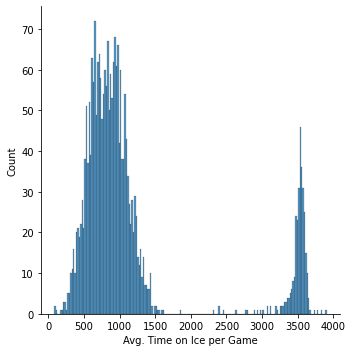

In [ ]:
# Time On Ice:
#
# Here we can see a clear separation in the mean timeOnIce in a players
# career. We know that these two groups are the forwards/defencemen and the
# goalies because a team plays only one goalie who plays 60 minutes a night,
# 6 defencemen, and 12 forwards (LW/C/RW) who take shifts for the duration of the
# game. We can even see a smaller separation between the forwards and defence.
#
# Our distribution plot shows us that goalies are averaging around 3500s per
# night, while defencemen and forwards are sitting around 800s and 500s seconds
# respectively.
#
# The next barplot shows that our assumptions about the categories in this data
# hold true. There is a clear separation between our categories, and the std is
# relatively small.

# Distribution Plot
sns.displot(df_players, x='timeOnIce', binwidth=20).set(xlabel='Avg. Time on Ice per Game')

[Text(0, 0.5, 'Avg. Time on Ice per Game'), Text(0.5, 0, 'Position')]

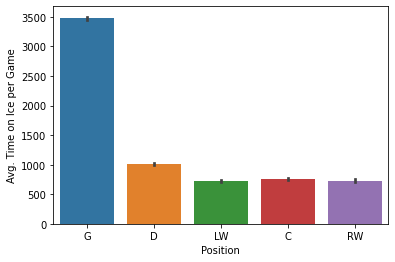

In [ ]:
# Categorical Barplot
sns.barplot(data=df_players, x="primaryPosition", y="timeOnIce", order=['G', 'D', 'LW', 'C', 'RW']).set(ylabel='Avg. Time on Ice per Game', xlabel='Position')

[Text(0, 0.5, 'Avg. Goals per Game'), Text(0.5, 0, 'Position')]

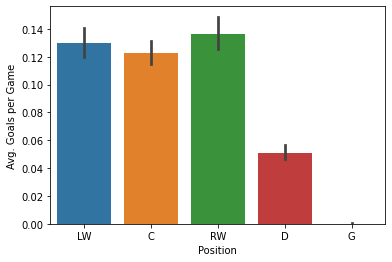

In [ ]:
# Goals:
#
# If we think about the roles on a hockey team, it is the job of the forwards to
# score the majority of a teams goals. In our barplot, we can clearly see the
# separation we would expect. LW, C, and RW score goals at a higher rate per game
# than our defencemen and goalies.
#
# We can also see a litte separation between our 3 different types of forwards.
# When teams coordinate their offensive play, the centermans (C) job is to try
# and setup one of the wingers (LW/RW) for a goal. Becuase the separation is less
# defined than we would see in other positions we can infer that most of the time
# a team spends attacking is not exactly to plan.

# Categorical Barplot
sns.barplot(data=df_players, x="primaryPosition", y="goals", order=['LW', 'C', 'RW', 'D', 'G']).set(ylabel='Avg. Goals per Game', xlabel='Position')

[Text(0, 0.5, 'Avg. Assists per Game'), Text(0.5, 0, 'Position')]

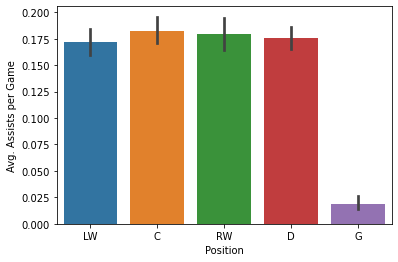

In [ ]:
# Assists:
#
# When we look at the distribution of assists, we cant really distinguish all of
# our different skaters. Because players maintain a certain formation during play
# (Forwards in front of defencemen) the puck is likely to travel through each
# position, thus crediting the player with an assist.
#
# We do see a significant decrease in the number of assists that goalies recieve. 

# Categorical Barplot
sns.barplot(data=df_players, x="primaryPosition", y="assists", order=['LW', 'C', 'RW', 'D', 'G']).set(ylabel='Avg. Assists per Game', xlabel='Position')

[Text(0, 0.5, 'Avg. Shots per Game'), Text(0.5, 0, 'Position')]

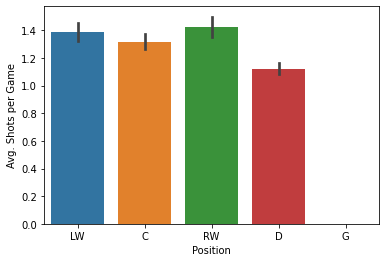

In [ ]:
# Shots:
#
# Shot distribution amongst the different positions looks similar to the Goal
# distribution. One noticable difference is that defencemen take a lot more shots
# for how many goals they score compared to the forwards. We can attribute this
# to how far back they usually shoot from. Defencemen rarely move far into the
# offensive zone so they shoot from a longer distance. These shots are considered
# lower quality because the goalie is more likely to stop it.

# Categorical Barplot
sns.barplot(data=df_players, x="primaryPosition", y="shots", order=['LW', 'C', 'RW', 'D', 'G']).set(ylabel='Avg. Shots per Game', xlabel='Position')

**Action:** Use correlation to estimate the relationship between some of the key variables. Remember to add text that helps a reader interpret the correlations. *Marks: 1* 

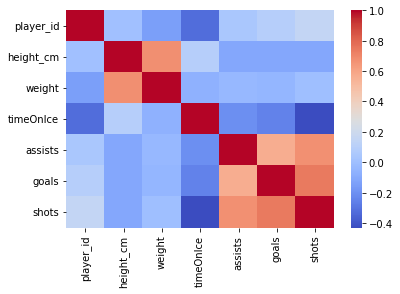

In [ ]:
# Relationships
#
# While it looks like there could be some interesting correlations here, I think
# most of them are obvious when you consider the nature of the game.
#
# The first one we see is height and weight. We would expect players to weigh
# more the taller they are. The heatmap reflects this showing a positive
# correlation value.
#
# Then there is a grouping of three positive correlations in the 'shots', 'goals'
# and 'assists' area. The easiest to explain is the "Shots" to "Goals"
# correlation. Becuase you must shoot the puck to score, we would expect to see 
# the number of goals a player scores rise with the number of shots they take.
# 
# However, the rest of the correlations might be strongly related becuase the 
# different positions play in such a different way. Goalies very rarely take shots
# and score, while the other skaters are much more likely to do both. Forwards
# and defencemen usually take lots of shots for the amount of ice time they play,
# while goalies don't.

# Generate Correlation map
correlation = df_players.corr()
sns.heatmap(correlation, cmap="coolwarm")

## <font color='lightblue'>3. Data preprocessing </font>

**Action:** Do you need to apply any preprocessing steps? E.g., convert a binary variable to 1/0, or use one-hot encoding to convert categorical variables? Apply at least one preprocessing step, and explain why you used it. *Marks: 2*

In [ ]:
# There are a few categoriacal fields we need to break down here. First, because
# I am interested in predicting the position of a player we need to ordinally
# encode that field. For the shootsCatches value, we want to use it as an input.
# So we can use one-hot encoding to get a 1/0 value for each option. I could
# have just binary encoded one specific dexterity (i.e. shootsL = 0/1), but I 
# decided to onehot encode this value to show that there is only two possible
# ways a player can shoot/catch.

# Ordinal encoding
encoder = OrdinalEncoder()
df_players_en = df_players
df_players_en[['primaryPosition']] = encoder.fit_transform(df_players[['primaryPosition']])

# One-hot encoding
df_onehot = pd.get_dummies(df_players_en[['shootsCatches']])
df_players_en = pd.concat([df_players_en,df_onehot], axis=1)
df_players_en = df_players_en.drop(['shootsCatches'], axis=1)

# Remove unimportant data
df_players_pp = df_players_en.drop(['player_id', 'firstName', 'lastName', 'nationality', 'birthCity', 'birthDate', 'birthStateProvince', 'height'], axis=1)
df_players_pp.head()

,primaryPosition,height_cm,weight,timeOnIce,assists,goals,shots,shootsCatches_L,shootsCatches_R
0,4.0,185.42,207.0,1116.709964,0.430605,0.320285,3.030249,1,0
1,1.0,185.42,210.0,1091.200501,0.205514,0.030075,0.791980,0,1
2,1.0,180.34,180.0,1181.377593,0.390041,0.139004,2.338174,1,0
3,1.0,177.80,192.0,1429.192661,0.344954,0.073394,1.324771,1,0
4,1.0,190.50,220.0,1313.008734,0.318777,0.104803,1.840611,0,1


**Action:** Split your data into training and testing datasets *Marks: 1*

In [ ]:
# Split data into predictors (X) and target (y)
X = df_players_pp.drop('primaryPosition', axis=1)
y = df_players_pp['primaryPosition']

# Split data into testing and traning sets at 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

**Action: (optional)** Scale any numeric variables. If you have no binary or categorical variables that need transforming, scaling will count towards your marks for your preprocessing step.

In [ ]:
# Scale remaining numerical values
scaler = StandardScaler()
scaling_cols = ['height_cm', 'weight', 'timeOnIce', 'assists', 'goals', 'shots']
X_train[scaling_cols] = scaler.fit_transform(X_train[scaling_cols])
X_test[scaling_cols] = scaler.fit_transform(X_test[scaling_cols])

## <font color='lightblue'>4. Build a model</font>



**Action:** Use your training dataset to build a model with the goal of predicting a target variable. *Marks: 2*

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Build, fit, and predict a decision tree classifier
classifier = DecisionTreeClassifier(max_depth=5)
classifier_res = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## <font color='lightblue'>5. Measure performance</font>

**Action:** Use your testing dataset to estimate the performance of your model. Add text describing what kind of measure you used. *Marks: 2*

Text(33.0, 0.5, 'True label')

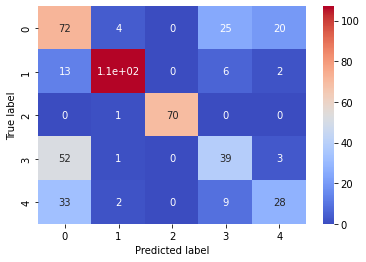

In [ ]:
# Generate confusion matrix to see how our model performed
cm = confusion_matrix(y_test, y_pred)

# Display heatmap
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
# Display accuracy
print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(sk.metrics.precision_score(y_test, y_pred, average='micro')))
print('Recal: {:.2f}'.format(sk.metrics.recall_score(y_test, y_pred, average='micro')))

Accuracy: 0.65
Precision: 0.65
Recal: 0.65


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atlea

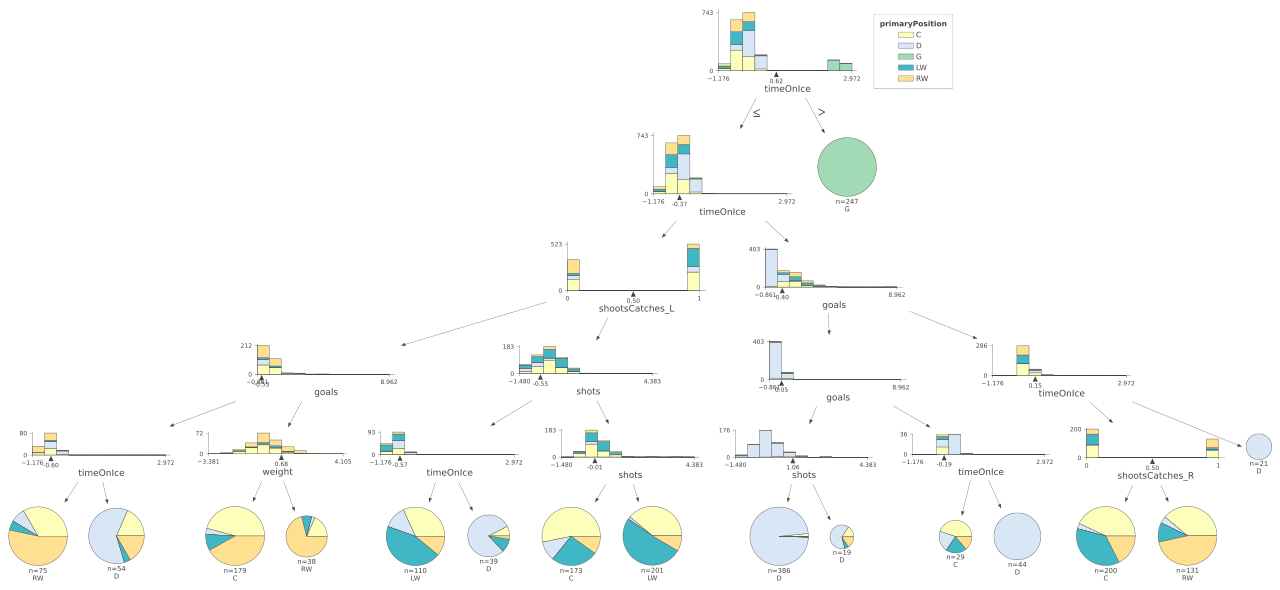

In [ ]:
# Visualize the decision tree for the training data
viz = dtreeviz(classifier_res, X_train, y_train,
                target_name="primaryPosition",
                feature_names=X_train.columns.to_list(),
                class_names={0:'C',1:'D',2:'G',3:'LW',4:'RW'},
                scale=1.0)
viz

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


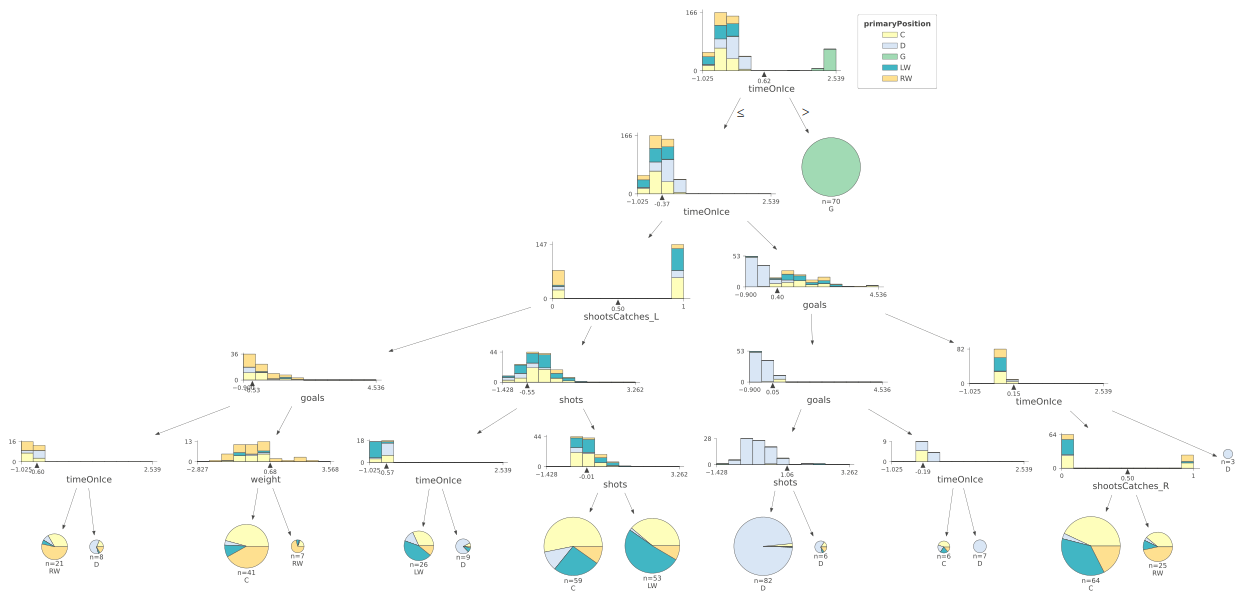

In [ ]:
# Visualize the decision tree for the testing data
viz = dtreeviz(classifier_res, X_test, y_test,
                target_name="primaryPosition",
                feature_names=X_test.columns.to_list(),
                class_names={0:'C',1:'D',2:'G',3:'LW',4:'RW'},
                scale=1.0)
viz

height_cm         -0.043368
weight            -0.436965
timeOnIce         -0.765503
assists           -1.096291
goals             -0.899611
shots             -1.428032
shootsCatches_L    1.000000
shootsCatches_R    0.000000
Name: 1327, dtype: float64
3.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


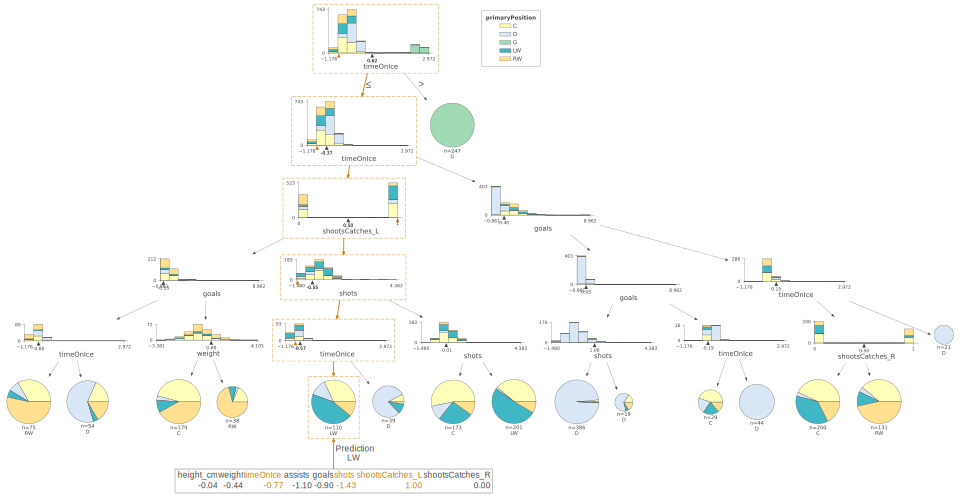

In [ ]:
# Vizualize one prediction
test_player = 45
X_values_for_pred = X_test.iloc[test_player]
print(X_values_for_pred)
print(y_test.iloc[test_player])
viz_one_pred = dtreeviz(classifier_res, X_train, y_train,
                target_name="primaryPosition",
                feature_names=X_train.columns.to_list(),
                class_names={0:'C',1:'D',2:'G',3:'LW',4:'RW'},
                scale=0.75,
                X=X_values_for_pred)
viz_one_pred

## <font color='lightblue'>6. Discussion and interpretation</font>

**Q1:** 
> What have you learnt about the ability to model and predict your variable of interest? *Marks: 1*
 
- Contrary to some of the accuracy scores the model recieved, I believe it is able to predict a players position quite well. It looks to have a really easy time distinguishing goalies from the data, and defencemen aren't too difficult either. I think most of the confusion comes from the 3 different forward roles, as those labels have the most incorrect predictions. This is to be expected, becuase in practice there isn't too much of a difference in play style amongst forwards. Players often play multiple forward roles for this very reason.

> What variables are responsible for the predictive ability of your model, and what does your model suggest about the relationships these variables have with your target variable? (i.e., think magnitude and sign of each effect). *Marks: 2*
 
- Looking at the decision tree visualization, we can see that the time a player spends on ice is the most important variable in determining if a player is a goalie or not. If a players ice time is greater than the threshold, the model is certain they are a goalie. Then it looks to separate forwards from defencemen by the avg time on ice again. Separating the higher ice time players by avg. goals per game appears to gather most of the defencemen in the dataset.

- To separate the remaining forwards, the first variable considered is whether the player shoots left handed or right handed. When we look at the distribution graph for this decision, we can see clearly that most left wingers shoot left, and right wingers shoot right. The only confusion comes from the centers that can be either.

> How did these relationships generalize to the with-held sample (i.e., testing data sample)? *Marks: 1*

- The variables seem to have the same effect on the testing set. Immediately identifying the goalies based on ice time, using ice time again to separate the defnece, then handedness to start to pick a forward category.
